Inverse Training: Adjusting Neural Network Weights to Match Predefined Values  
Study material: https://www.learnpytorch.io/

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Creating data

In [2]:
# Create parameters
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
len(X), len(y)

(50, 50)

Split data into training and testing sets

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize data

In [4]:
def predicitons_plot(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(7, 5))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

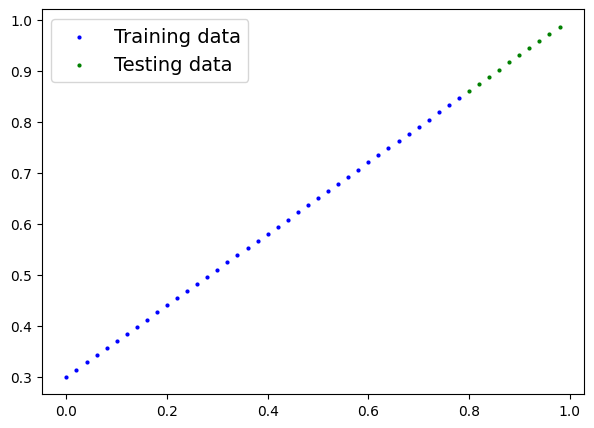

In [5]:
predicitons_plot()

Build linear regression model

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [7]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

Make prediction with the model

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

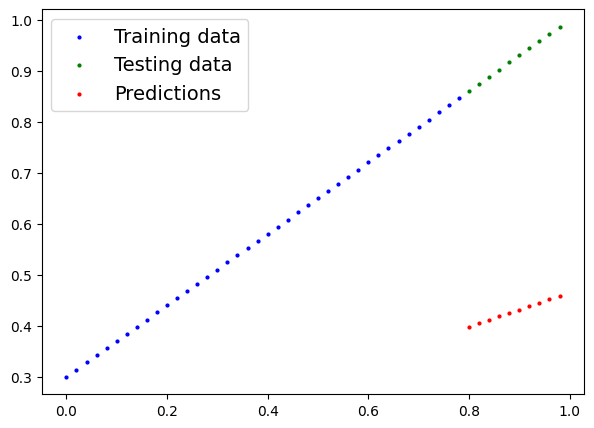

In [8]:
with torch.inference_mode():
  y_preds = model_0(X_test)
predicitons_plot(predictions=y_preds)

y_preds

Measure model prediction and adjust parameters

In [9]:
loss_fn = nn.L1Loss()
with torch.inference_mode():
  y_preds = model_0(X_test)
  l1_loss = loss_fn(y_preds, y_test)
l1_loss


tensor(0.4945)

In [10]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr - learning rate hyperparameter, defines how small/big the optimizer changes the parameters



Build a training and a testing loop

In [51]:
torch.manual_seed(42)

epochs = 1
for epoch in range(epochs):
  model_0.train()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds, y_train)
  print(f"Loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  print(model_0.state_dict())


Loss: 0.053148526698350906
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])


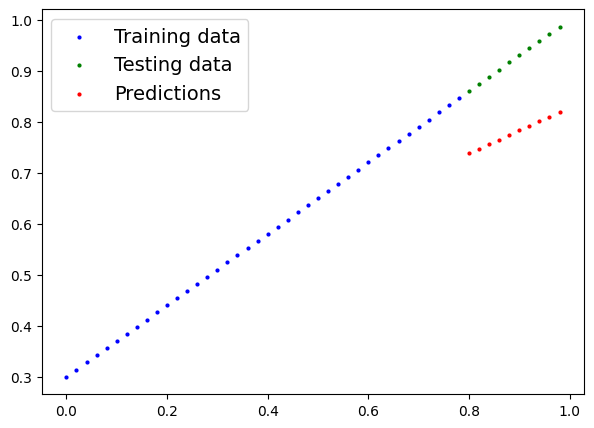

In [52]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
predicitons_plot(predictions=y_preds_new)
